<a href="https://colab.research.google.com/github/dmejiaho/TAM-2025-2/blob/main/Alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Librerias

In [26]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

##Ejercicio en clase

In [27]:
N = 1000
P = 20
X, Y = make_regression(n_samples=N, n_features=P, noise=1, random_state=42)
print(X.shape)
print(Y.shape)

(1000, 20)
(1000,)


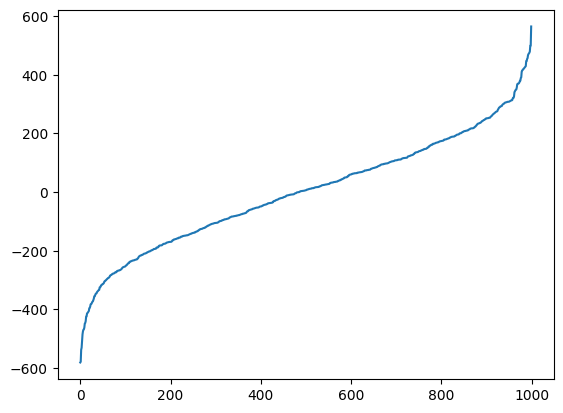

In [28]:
plt.plot(np.sort(Y))
plt.show()

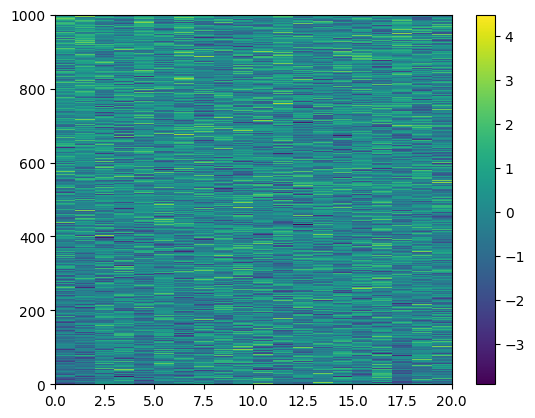

In [29]:
ind_ = np.argsort(Y)
plt.pcolormesh(X[ind_])
plt.colorbar()
plt.show()


In [30]:
def mincua_reg(X, Y, lamb_=1e-3):
  alpha = np.linalg.inv(X.T.dot(X) + lamb_*np.eye(X.shape[1])).dot(X.T).dot(Y)
  return alpha

[ 7.99999269e+01  9.86015897e+01  5.57286288e+00  2.41760761e-02
  8.64704289e+01 -3.94575875e-02  6.94411862e+01 -3.56275838e-03
  2.38619256e-02 -3.12145636e-02  1.86214575e+01  3.96564254e+01
  4.91812853e-03  3.10939044e+00 -4.42071056e-02  2.63860334e+01
 -2.41981026e-02  8.68971640e+01  3.51245931e-02  1.62243894e-02]


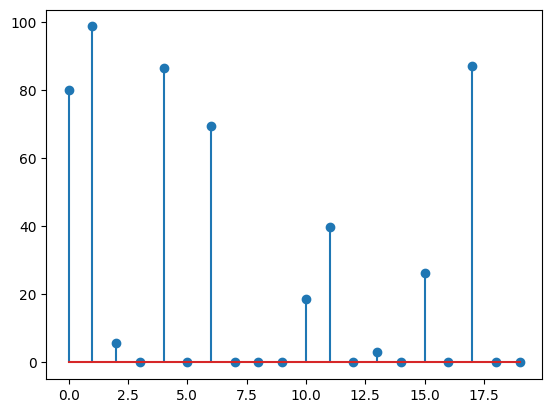

In [31]:
alpha = mincua_reg(X, Y)
print(alpha)
plt.stem(np.arange(len(alpha)),np.abs(alpha))
plt.show()

In [32]:
ypred = X.dot(alpha)

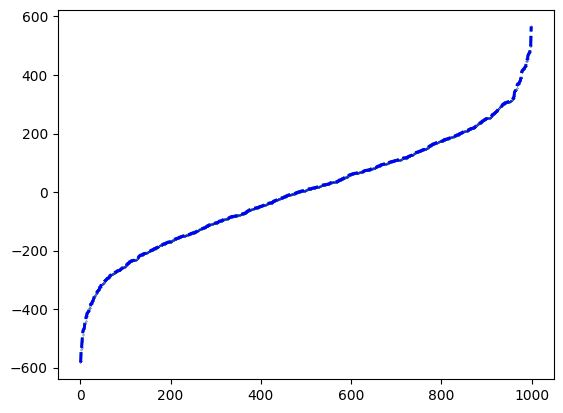

In [33]:
plt.plot(np.sort(Y), color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=0.2, label = 'original')
plt.plot(np.sort(ypred), color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=0.2, label = "pred")
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

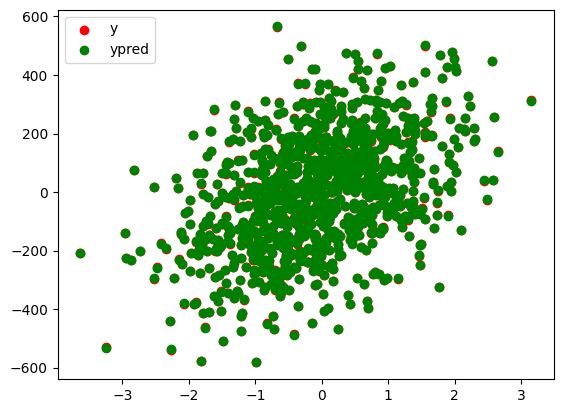

In [34]:
plt.scatter(X[ind_,0], Y[ind_], c='r', marker ='o', label = 'y')
plt.scatter(X[ind_,0], ypred[ind_], c='g', marker ='o', label = 'ypred')
plt.legend()
plt.show

##Base de datos fetch_california_housing

In [35]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.data.shape, housing.target.shape)
X = housing.data
Y = housing.target

(20640, 8) (20640,)


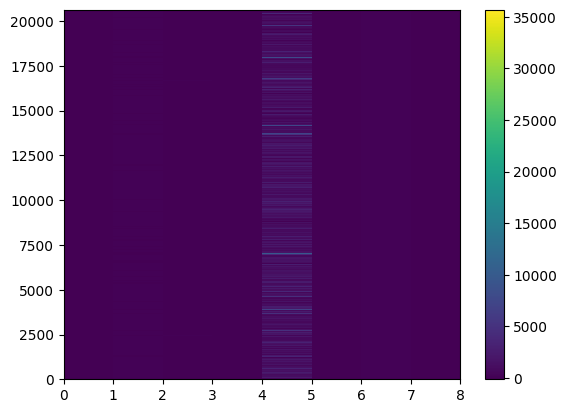

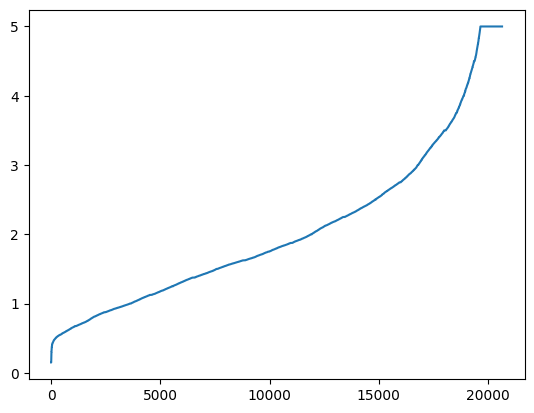

In [36]:
ind_ = np.argsort(housing.target)
plt.pcolormesh(housing.data[ind_])
plt.colorbar()
plt.show()
plt.plot(np.sort(housing.target))
plt.show()

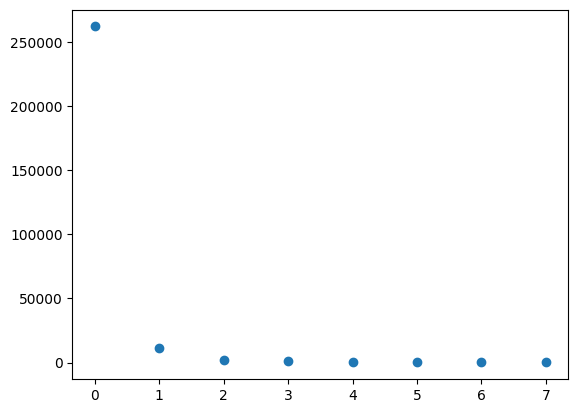

In [37]:
u,s,vt = np.linalg.svd(housing.data)
plt.scatter(np.arange(len(s)), s)
plt.show()

[ 5.13515017e-01  1.56511122e-02 -1.82527999e-01  8.65097653e-01
  7.79231011e-06 -4.69928946e-03 -6.39458572e-02 -1.63827338e-02]
(8,)


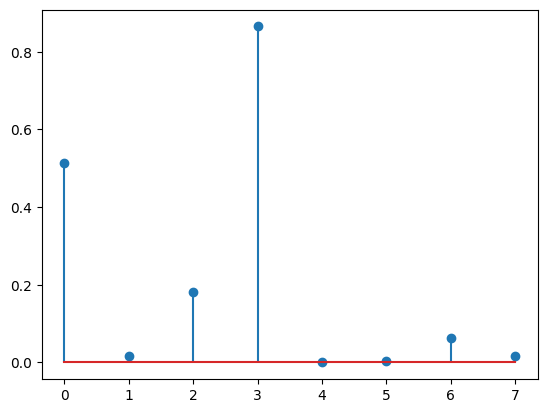

In [38]:
alpha_h = mincua_reg(housing.data, housing.target)
print(alpha_h)
print(alpha_h.shape)
plt.stem(np.arange(len(alpha_h)),np.abs(alpha_h))
plt.show()

In [39]:
target = housing.data.dot(alpha_h)

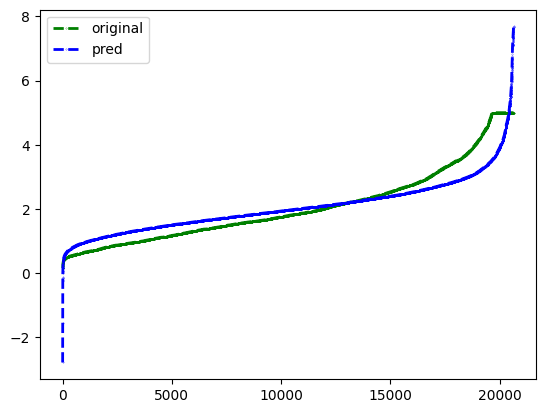

In [40]:
plt.plot(np.sort(housing.target), color='green', marker='o', linestyle='dashed',
     linewidth=2, markersize=0.2, label = 'original')
plt.plot(np.sort(target), color='blue', marker='o', linestyle='dashed',
     linewidth=2, markersize=0.2, label = "pred")
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

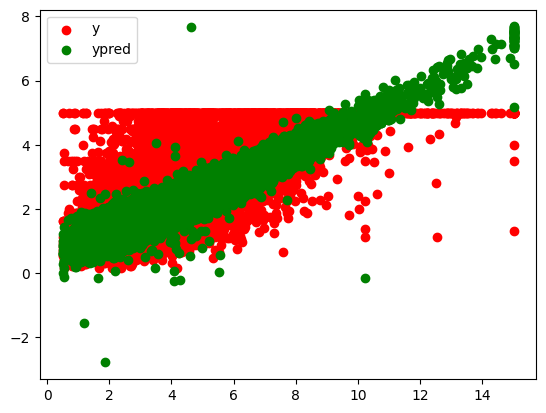

In [41]:
plt.scatter(X[ind_,0], Y[ind_], c='r', marker ='o', label = 'y')
plt.scatter(X[ind_,0],target[ind_], c='g', marker ='o', label = 'ypred')
plt.legend()
plt.show

##Alpha por gradiente descendente

Calculando alpha de forma iterativa...

Alpha Iterativo (Ridge) calculado:
[ 2.06855817  0.83767739  0.14769071 -0.23051787  0.25405465  0.00589673
 -0.04191625 -0.67787363 -0.64706189]


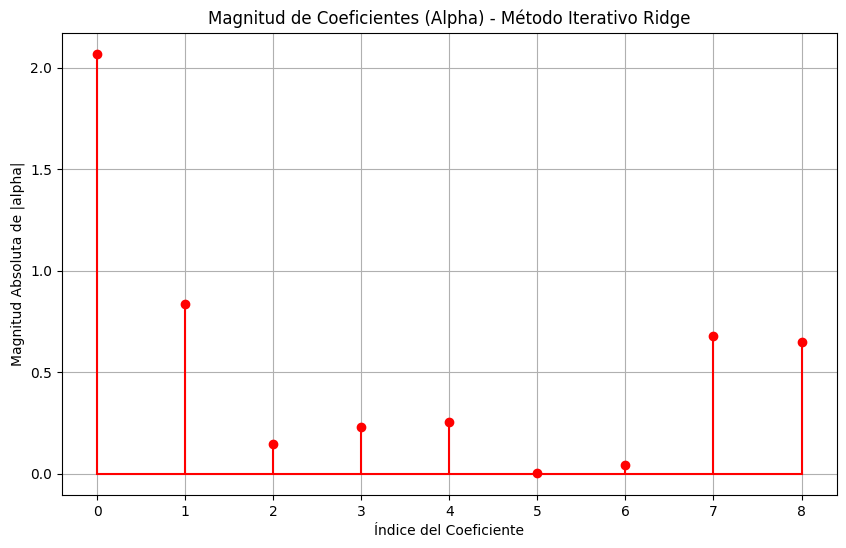

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_orig = housing.data
Y = housing.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)


m = X_scaled.shape[0]
X_b = np.c_[np.ones((m, 1)), X_scaled]

# --- 2. Descenso de Gradiente para Regresión de Ridge (Método Iterativo) ---

# Hiperparámetros
learning_rate = 0.01
n_iterations = 1000
lamb_ = 1e-3  # Parámetro de regularización

# Inicialización de alpha con ceros
alpha_iterativo = np.zeros(X_b.shape[1])

# Historial para la pérdida (no se usa para la gráfica actual, pero es buena práctica)
loss_history_ridge = []

print("Calculando alpha de forma iterativa...")
for iteration in range(n_iterations):
    predictions = X_b.dot(alpha_iterativo)
    errors = predictions - Y

    gradients_mse = (2/m) * X_b.T.dot(errors)

    gradients_reg = 2 * lamb_ * alpha_iterativo
    gradients_reg[0] = 0 # No regularizar el intercepto

    total_gradient = gradients_mse + gradients_reg

    alpha_iterativo = alpha_iterativo - learning_rate * total_gradient

    # Calcular y guardar la pérdida (opcional)
    loss = (1/m) * np.sum(errors**2) + lamb_ * np.sum(alpha_iterativo[1:]**2)
    loss_history_ridge.append(loss)

print("\nAlpha Iterativo (Ridge) calculado:")
print(alpha_iterativo)


plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(alpha_iterativo)), np.abs(alpha_iterativo), linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('Magnitud de Coeficientes (Alpha) - Método Iterativo Ridge')
plt.xlabel('Índice del Coeficiente')
plt.ylabel('Magnitud Absoluta de |alpha|')

plt.grid(True)
plt.show()

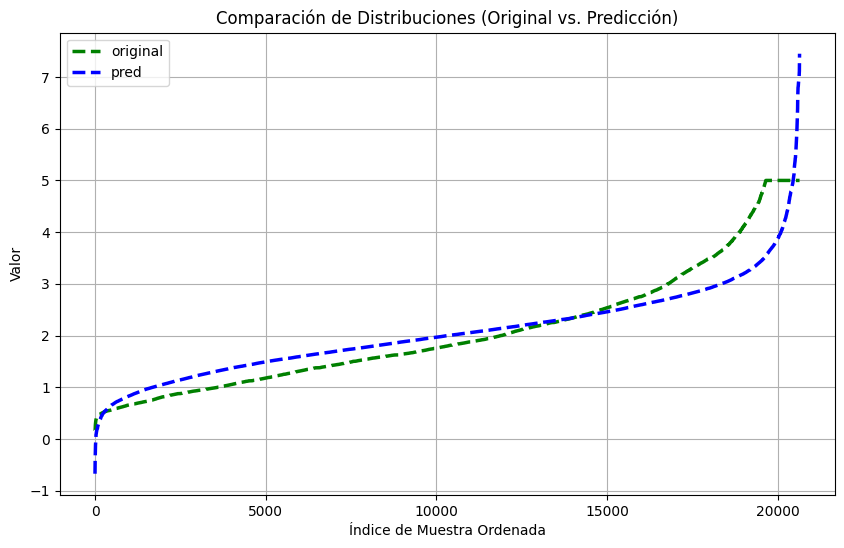

In [43]:

Y_pred_iterativo = X_b.dot(alpha_iterativo)

Y_original_sorted = np.sort(Y)
Y_pred_sorted = np.sort(Y_pred_iterativo)


plt.figure(figsize=(10, 6))

plt.plot(Y_original_sorted, label='original', color='green', linestyle='--', linewidth=2.5)

plt.plot(Y_pred_sorted, label='pred', color='blue', linestyle='--', linewidth=2.5)

plt.title('Comparación de Distribuciones (Original vs. Predicción)')
plt.xlabel('Índice de Muestra Ordenada')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

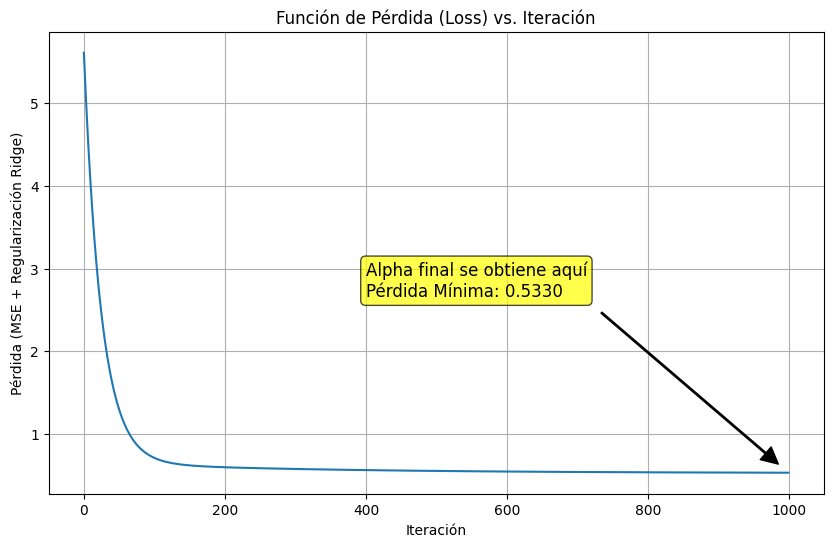

In [44]:
housing = fetch_california_housing()
X_orig = housing.data
Y = housing.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_orig)
m = X_scaled.shape[0]
X_b = np.c_[np.ones((m, 1)), X_scaled]

learning_rate = 0.01
n_iterations = 1000
lamb_ = 1e-3

alpha_iterativo = np.zeros(X_b.shape[1])
loss_history_ridge = []

for iteration in range(n_iterations):
    predictions = X_b.dot(alpha_iterativo)
    errors = predictions - Y
    loss = (1/m) * np.sum(errors**2) + lamb_ * np.sum(alpha_iterativo[1:]**2)
    loss_history_ridge.append(loss) # Guardamos la pérdida de esta iteración

    gradients_mse = (2/m) * X_b.T.dot(errors)
    gradients_reg = 2 * lamb_ * alpha_iterativo
    gradients_reg[0] = 0
    total_gradient = gradients_mse + gradients_reg
    alpha_iterativo = alpha_iterativo - learning_rate * total_gradient

plt.figure(figsize=(10, 6))
plt.plot(np.arange(n_iterations), loss_history_ridge)
plt.title('Función de Pérdida (Loss) vs. Iteración')
plt.xlabel('Iteración')
plt.ylabel('Pérdida (MSE + Regularización Ridge)')
plt.grid(True)

final_iteration = n_iterations - 1
final_loss = loss_history_ridge[-1]

plt.annotate(f'Alpha final se obtiene aquí\nPérdida Mínima: {final_loss:.4f}',
             xy=(final_iteration, final_loss), # El punto a señalar (la punta de la flecha)
             xytext=(final_iteration * 0.4, final_loss * 5), # Posición del texto
             arrowprops=dict(facecolor='black', shrink=0.05, width=1),
             fontsize=12,
             bbox=dict(boxstyle="round,pad=0.3", fc="yellow", ec="black", lw=1, alpha=0.7))

plt.show()

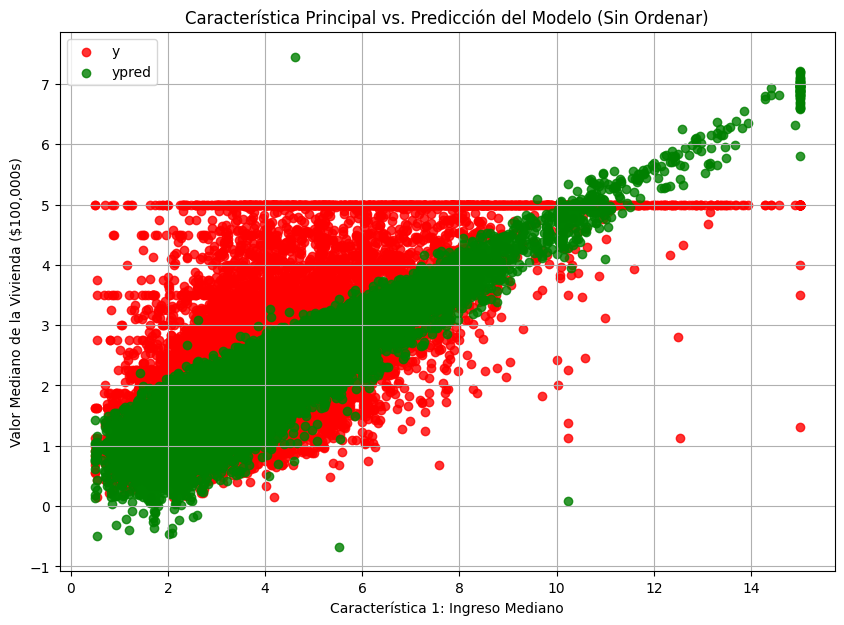

In [46]:

target_iterativo = X_b.dot(alpha_iterativo)

plt.figure(figsize=(10, 7))

plt.scatter(X_orig[:, 0], Y,
            c='red', marker='o', label='y', alpha=0.8)

plt.scatter(X_orig[:, 0], target_iterativo,
            c='green', marker='o', label='ypred', alpha=0.8)

plt.title('Característica Principal vs. Predicción del Modelo (Sin Ordenar)')
plt.xlabel('Característica 1: Ingreso Mediano')
plt.ylabel('Valor Mediano de la Vivienda ($100,000s)')
plt.legend()
plt.grid(True)
plt.show()